In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv('AXISBANK.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,04-01-2000,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387280e+11,NaN,NaN,NaN
2,05-01-2000,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,06-01-2000,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,07-01-2000,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868748e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653260e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [5]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [6]:
#removing unwonted columns from the stock dataset

list_drop = ['%Deliverble', 'Deliverable Volume']
df.drop(list_drop,axis = 1, inplace = True )

In [7]:
medain_of_trade=df.Trades.median()
medain_of_trade

93186.5

In [8]:
df.Trades.fillna(medain_of_trade, inplace =True)

In [9]:
df.isnull().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
Trades        0
dtype: int64

In [10]:
#removing timestamp from the date and creating a new date column 
df['Date'] = pd.to_datetime(df['Date'])
df['date'] = df['Date'].dt.date

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10852\190157047.py:2: UserWarning: Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10852\190157047.py:2: UserWarning: Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10852\190157047.py:2: UserWarning: Parsing '17-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10852\190157047.py:2: UserWarning: Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\lenovo\AppData\Local\Te

In [11]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,date
0,2000-03-01,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,93186.5,2000-03-01
1,2000-04-01,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387280e+11,93186.5,2000-04-01
2,2000-05-01,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,93186.5,2000-05-01
3,2000-06-01,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,93186.5,2000-06-01
4,2000-07-01,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,93186.5,2000-07-01


<AxesSubplot:>

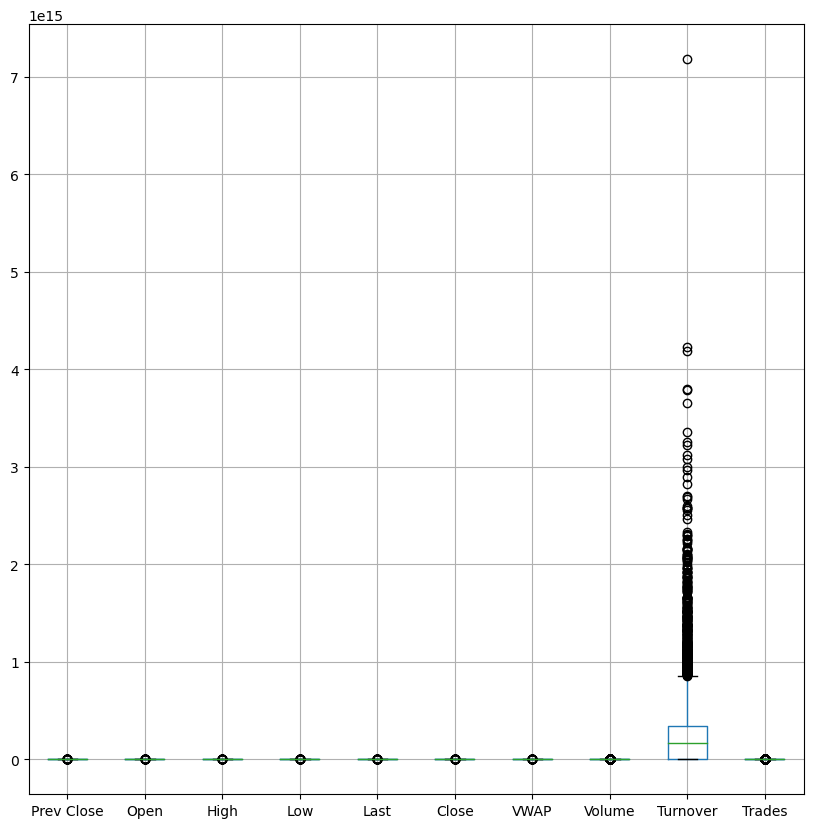

In [12]:
plt.figure(figsize=[10,10])
df.boxplot()

outliers are present in Turnover since we don't work on turnover no need to work on outliers

In [13]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High']#.as_matrix()
low_prices = df.loc[:,'Low']#.as_matrix()
mid_prices = (high_prices+low_prices)/2.0

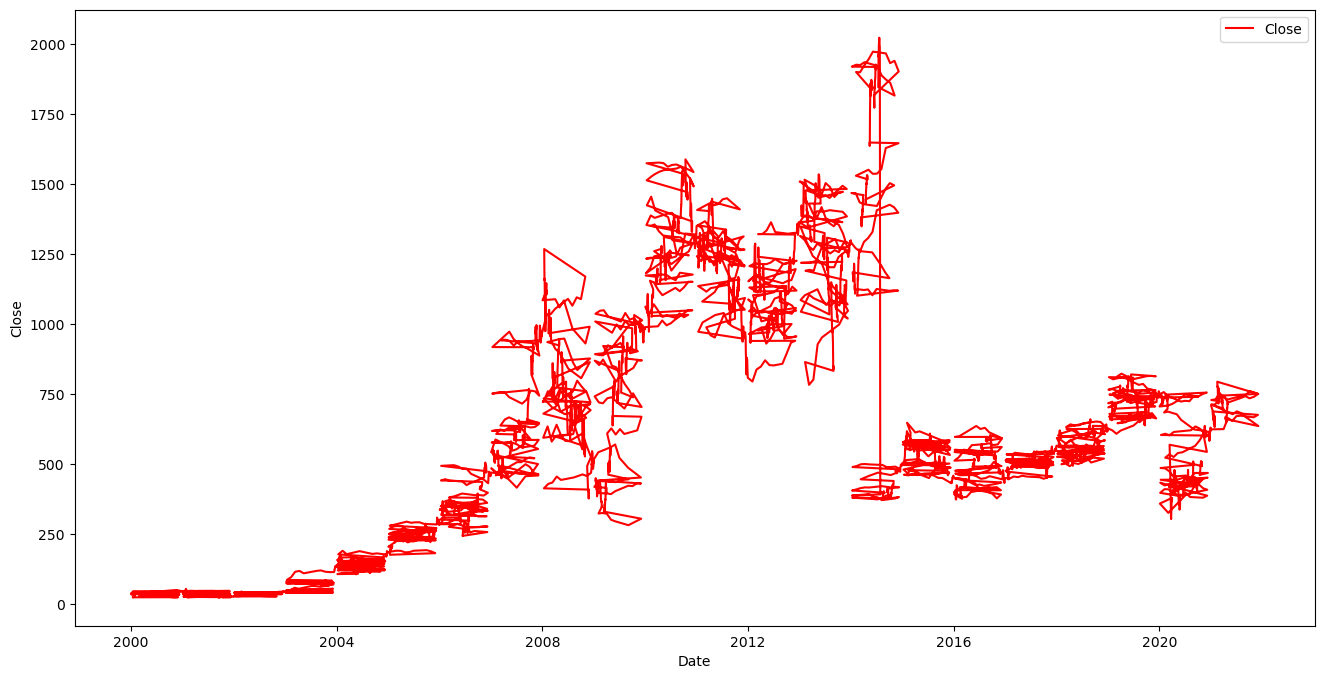

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'], color='red', label='Close') 
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [15]:
features = ['Close', 'Open', 'High'] 


In [16]:
# Fill missing values  
df[features] = df[features].fillna(0)

# Normalize features
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features].values)

In [17]:
# Normalize features
scaler = MinMaxScaler()  
df[features] = scaler.fit_transform(df[features].values)

In [18]:
X = df[features].values
y = df['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [19]:
# Reshape X for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [20]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [21]:
# Train model
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
133/133 [==============================] - 4s 9ms/step - loss: 0.0401 - val_loss: 0.0035
Epoch 2/100
133/133 [==============================] - 1s 5ms/step - loss: 6.2015e-04 - val_loss: 4.0316e-05
Epoch 3/100
133/133 [==============================] - 1s 5ms/step - loss: 3.4404e-05 - val_loss: 2.2485e-05
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 2.3418e-05 - val_loss: 1.8824e-05
Epoch 5/100
133/133 [==============================] - 1s 5ms/step - loss: 2.1586e-05 - val_loss: 1.8416e-05
Epoch 6/100
133/133 [==============================] - 1s 5ms/step - loss: 2.1417e-05 - val_loss: 1.8594e-05
Epoch 7/100
133/133 [==============================] - 1s 5ms/step - loss: 2.0874e-05 - val_loss: 1.8133e-05
Epoch 8/100
133/133 [==============================] - 1s 5ms/step - loss: 2.0462e-05 - val_loss: 1.7407e-05
Epoch 9/100
133/133 [==============================] - 1s 5ms/step - loss: 1.9947e-05 - val_loss: 1.7190e-05
Epoch 10/100
133/133 [=====

In [22]:
# Evaluate model
test_pred = model.predict(X_test)
test_score = model.evaluate(X_test, y_test, verbose=0)
print('LSTM test MSE:', test_score)

34/34 [==============================] - 1s 3ms/step
LSTM test MSE: 1.7314237084065098e-06


In [23]:
# Make predictions
predictions = model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [27]:
import numpy as np

in_common = np.in1d(X_train, X_test)
print(in_common.any())

in_common = np.in1d(y_train, y_test)  
print(in_common.any())

True
True


the project demonstrated core concepts of applying LSTMs to stock forecasting but also highlighted opportunities around model validation, feature expansion, and interpretability that could be explored in future work.